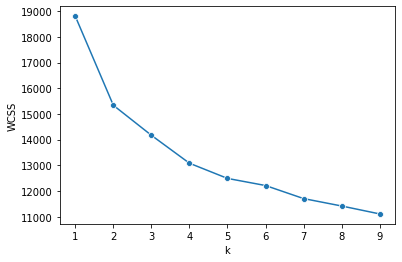

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pdb


dataframe = pd.read_csv("BR_mod.csv")
dataframe.head()

#replace missing values with mean of column
dataframe = dataframe.fillna(dataframe.mean())

#calculate distance
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
     dist=0.0   
     for j in range(0,len(val)):
        dist += (centroids[int(cluster[i]), j]-val[j])**2   
     sum += np.sqrt(dist)
  return sum

def kmeans(X, k):
  diff = 1
  cluster = np.zeros(X.shape[0])
  centroids = dataframe.sample(n=k).values
  #pdb.set_trace()
  while diff:
     # for each observation
     for i, row in enumerate(X):
         mn_dist = float('inf')
         # dist of the point from all centroids
         for idx, centroid in enumerate(centroids):
            #d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
            dist = 0.0
            #pdb.set_trace()
            for j in range(0,len(centroid)):
                #print(j)
                dist += (centroid[j]-row[j])**2  
            d = np.sqrt(dist)    
            # store closest centroid
            if mn_dist > d:
               mn_dist = d
               cluster[i] = idx
     new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
     #pdb.set_trace()
     if(centroids.shape[0]!= new_centroids.shape[0]):
            diff=0;
     elif np.count_nonzero(centroids - new_centroids) == 0:
        diff = 0
     else:
        centroids = new_centroids
  return centroids, cluster





X = dataframe.values

cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)
    
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()


0.0
3.0
0.0
3.0
3.0
3.0
1.0
3.0
1.0
1.0


/Users/shashadhar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/shashadhar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


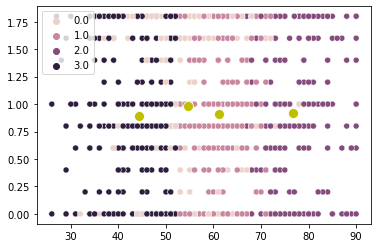

In [4]:
k = 4
centroids, cluster = kmeans(X, k)
for i in range(0,10):
    print(cluster[i])

sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.show()